Potato disease

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [45]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [10]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [11]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
len(dataset)

68

In [13]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 2 1 1 1 0 0 0 0 1 0 1 0 0 2 2 2 0 0 0 1 0 1 0 1 1 0 1 0 1]


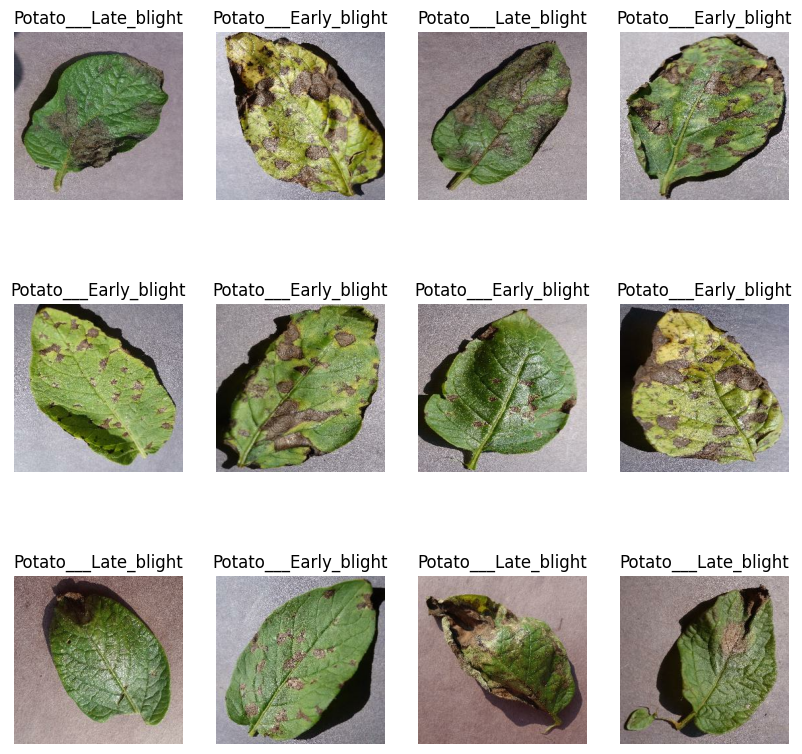

In [20]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
   

80%-->Training


20%--> 10%-->Validation + 10% -->Test

In [22]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [23]:
train_ds=dataset.take(54)
len(train_ds)

54

In [24]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [25]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [26]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [27]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [31]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [32]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [33]:
len(train_ds)

54

In [34]:
len(val_ds)

6

In [35]:
len(test_ds)

8

In [36]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),

])

In [38]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [41]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [46]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 [==============================] - 131s 2s/step - loss: 0.7892 - accuracy: 0.6094 - val_loss: 0.6820 - val_accuracy: 0.7552
Epoch 2/20
54/54 [==============================] - 127s 2s/step - loss: 0.5855 - accuracy: 0.7656 - val_loss: 0.4223 - val_accuracy: 0.8229
Epoch 3/20
54/54 [==============================] - 118s 2s/step - loss: 0.4310 - accuracy: 0.8275 - val_loss: 0.2966 - val_accuracy: 0.9062
Epoch 4/20
54/54 [==============================] - 116s 2s/step - loss: 0.2633 - accuracy: 0.8981 - val_loss: 0.3804 - val_accuracy: 0.8333
Epoch 5/20
54/54 [==============================] - 118s 2s/step - loss: 0.2147 - accuracy: 0.9207 - val_loss: 0.5768 - val_accuracy: 0.7812
Epoch 6/20
54/54 [==============================] - 117s 2s/step - loss: 0.1779 - accuracy: 0.9300 - val_loss: 1.0363 - val_accuracy: 0.7448
Epoch 7/20
54/54 [==============================] - 94s 2s/step - loss: 0.1644 - accuracy: 0.9398 - val_loss: 0.1658 - val_accuracy: 0.9427
Epoch 8/20
54/

In [48]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 355ms/step - loss: 0.0854 - accuracy: 0.9570


In [49]:
scores

[0.08535552024841309, 0.95703125]

In [50]:
history


In [51]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
history.history["accuracy"]

[0.609375,
 0.765625,
 0.8275462985038757,
 0.8981481194496155,
 0.9207175970077515,
 0.9299768805503845,
 0.9398148059844971,
 0.9560185074806213,
 0.9548611044883728,
 0.9571759104728699,
 0.9635416865348816,
 0.9664351940155029,
 0.9722222089767456,
 0.9722222089767456,
 0.9756944179534912,
 0.9762731194496155,
 0.9693287014961243,
 0.9884259104728699,
 0.9832175970077515,
 0.9791666865348816]

In [54]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation LOss')

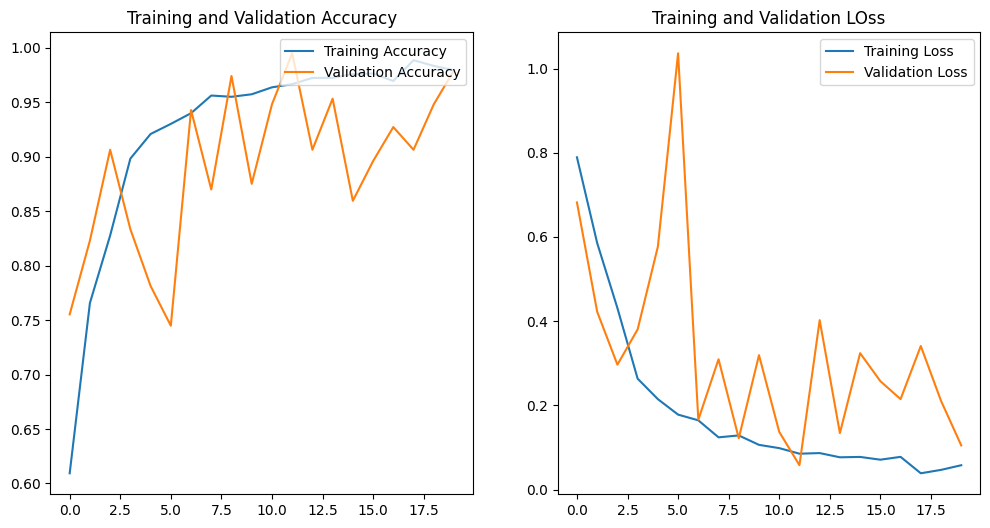

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation LOss")


First image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 407ms/step
Predicted label: Potato___Early_blight


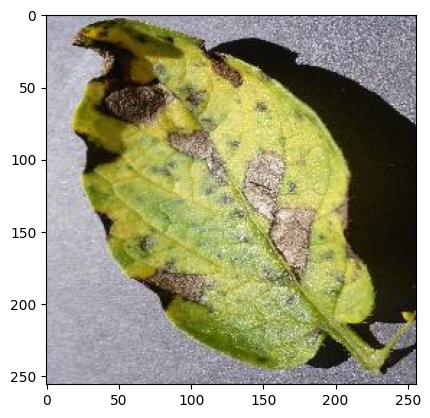

In [60]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
     first_image=image_batch[0].numpy().astype("uint8")
     first_label=label_batch[0].numpy()

     print("First image to predict")
     plt.imshow(first_image)
     print("actual label:",class_names[first_label])

     batch_prediction=model.predict(image_batch)
     print("Predicted label:",class_names[np.argmax(batch_prediction[0])])


In [76]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


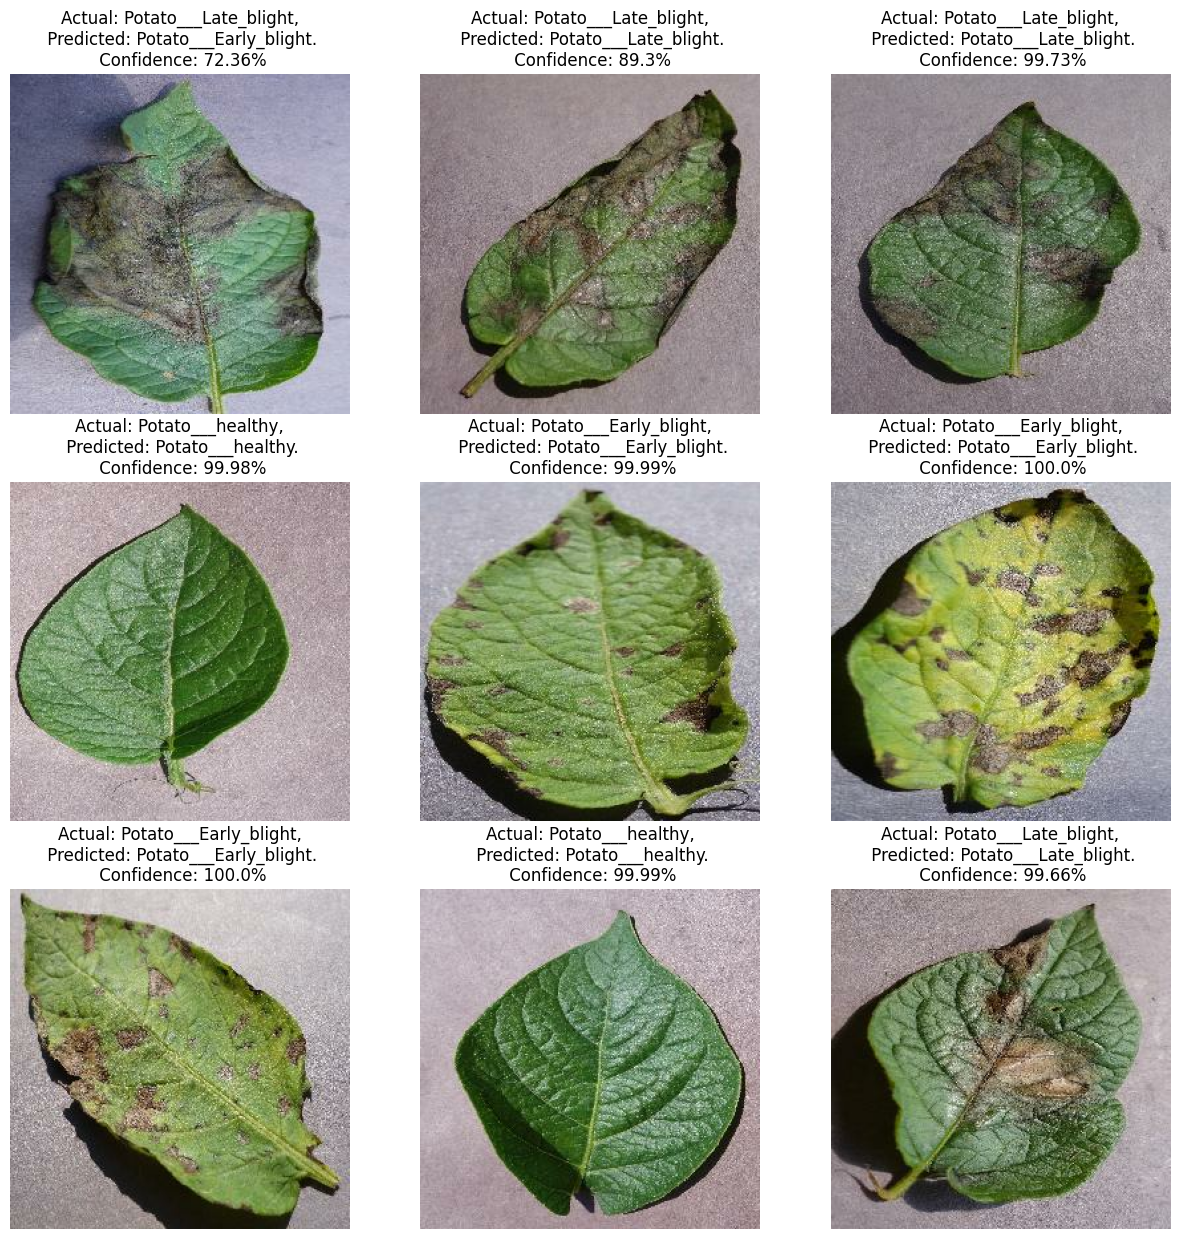

In [77]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [78]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [ ]:
model.save("../models/")